# CUSTOMER CHURN ANALYSIS PROJECT

#### Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('customer_churn.csv')

First 5 entries

In [3]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

The dataset contains 7043 rows and 21 columns

Datatype of the features

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Column Names

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Information about the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Missing Values

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

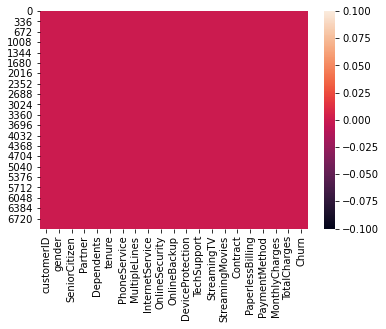

In [9]:
sns.heatmap(df.isnull())

# Statistical Calculation

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Mean is less than 75 percentile except for SeniorCitizen. Minimum value for SeniorCitizen and tenure is zero.

In [11]:
df.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7163-OCEQI,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<AxesSubplot:>

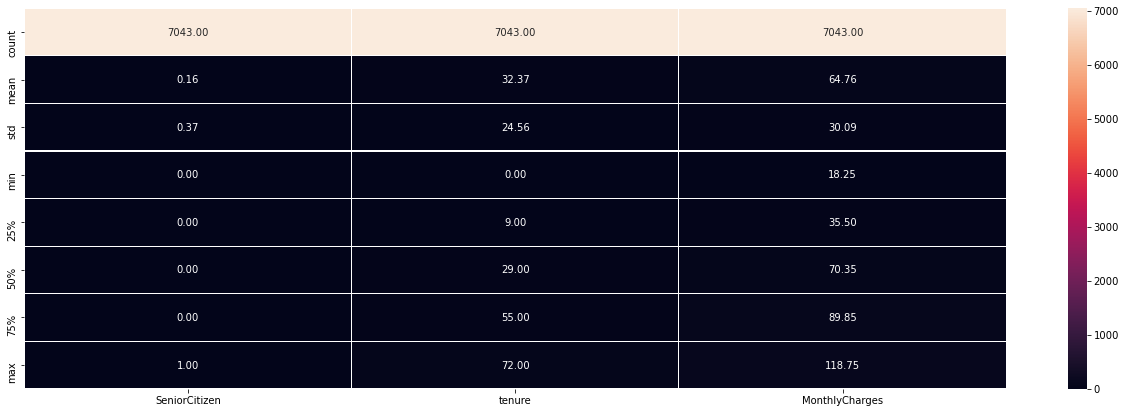

In [12]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

In [13]:
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [16]:
def bar_plot(variable):
    
    # get feature
    var = df[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    
    print("{}:\n{}".format(variable,varValue))

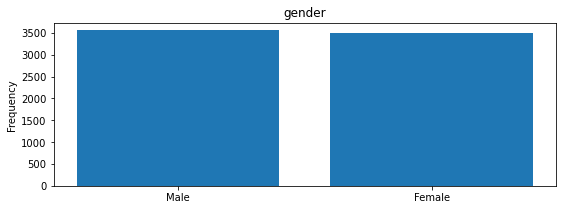

gender:
Male      3555
Female    3488
Name: gender, dtype: int64


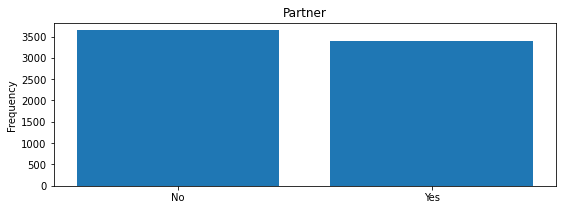

Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64


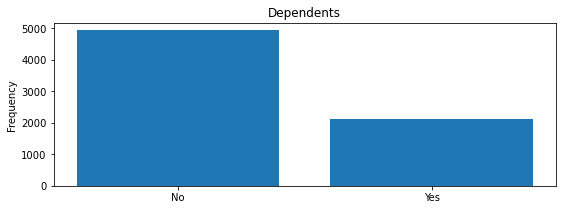

Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64


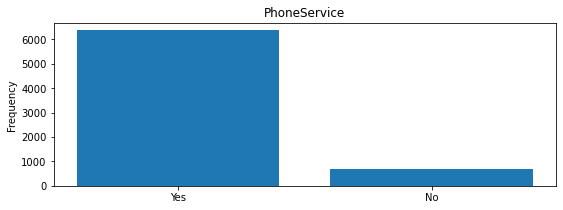

PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64


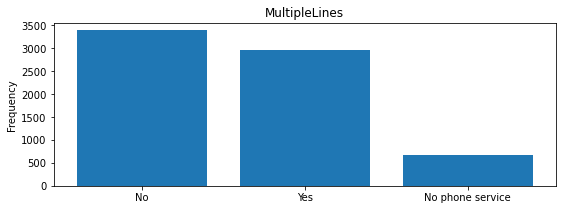

MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


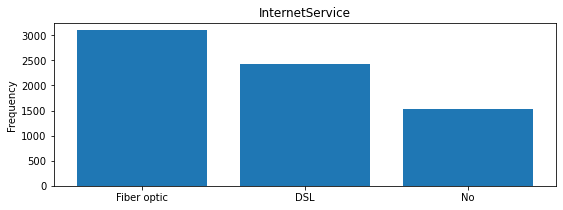

InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


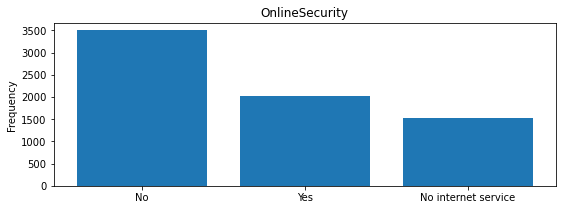

OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


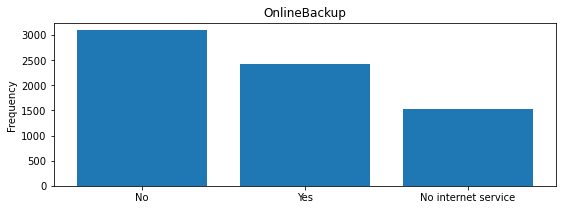

OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


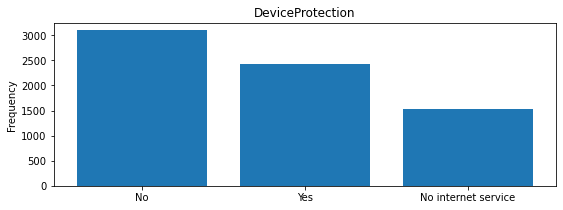

DeviceProtection:
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


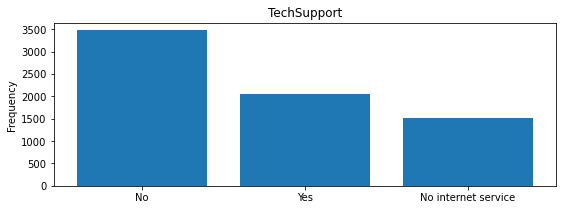

TechSupport:
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


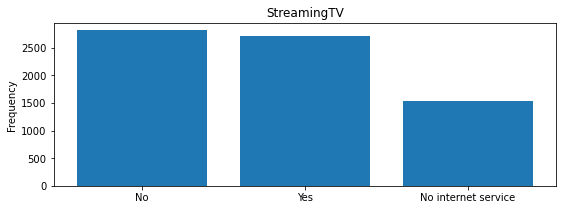

StreamingTV:
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


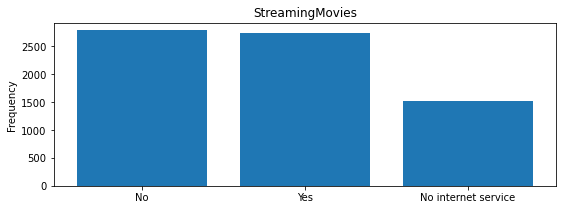

StreamingMovies:
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


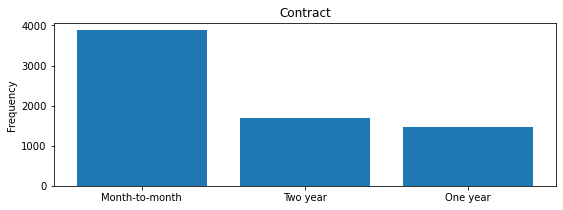

Contract:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


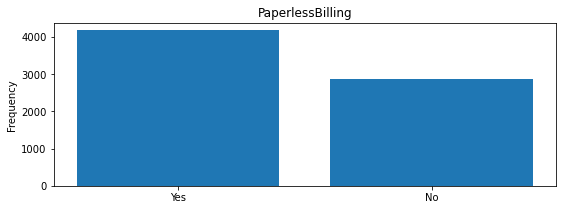

PaperlessBilling:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


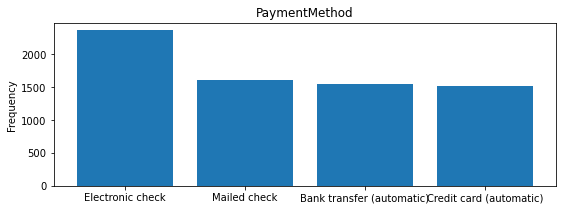

PaymentMethod:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


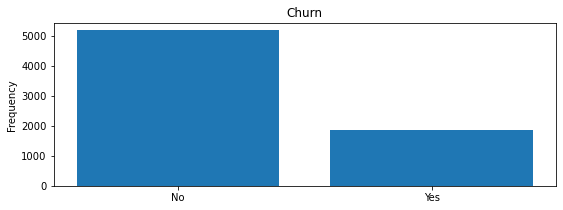

Churn:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [17]:
category = [ 'gender',  'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

for i in category:
    bar_plot(i)

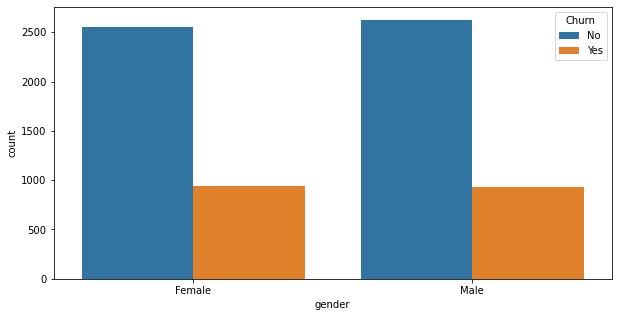

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="gender",hue="Churn",data=df);

There is not much between Female and Male in terms of churn.

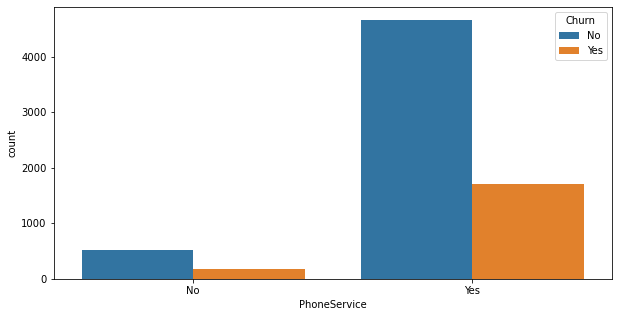

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="PhoneService",hue="Churn",data=df);

People with PhoneService does not seem to churn more.

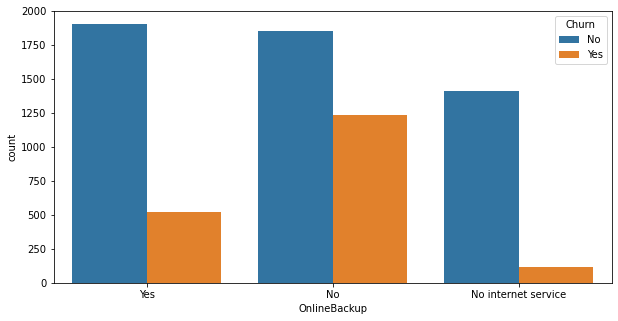

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x="OnlineBackup",hue="Churn",data=df);

People with no online backup churn more and that with no internet service do not churn more.

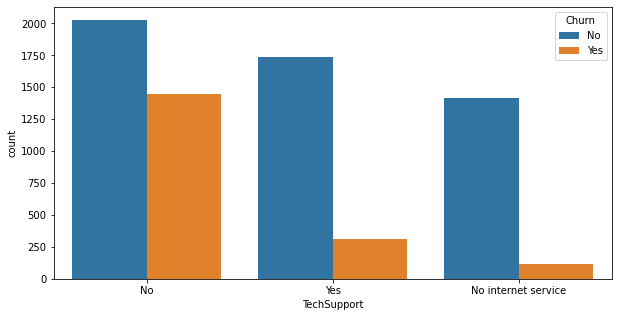

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="TechSupport",hue="Churn",data=df);

People with No tech Support mostly churn.

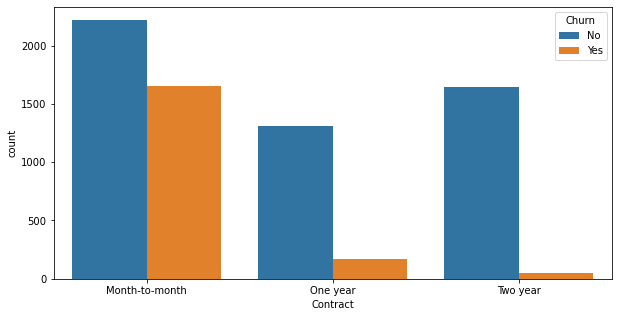

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x="Contract",hue="Churn",data=df);

People with Two year Contract doesn't churn more.

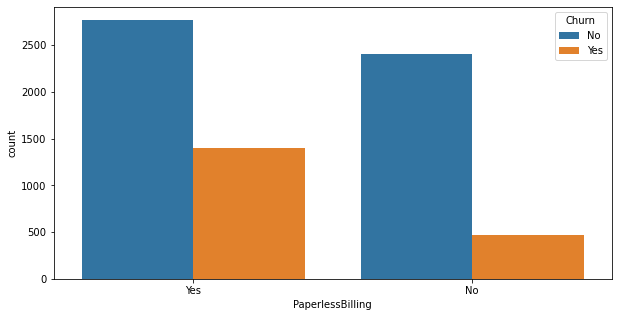

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x="PaperlessBilling",hue="Churn",data=df);

People preferring Paper Billing seem to churn less.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

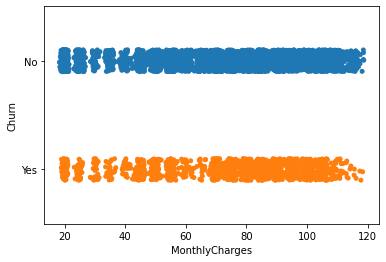

In [24]:
sns.stripplot(x="MonthlyCharges",y="Churn",data=df)

Less the monthly charges less is the churn.

# Checking Correlation

In [25]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


In [26]:
category

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in category:
    df[value]=LE.fit_transform(df[value])

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
df.drop("customerID",axis=1,inplace=True)

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Separating x(Independent) and y(target) variable.

In [31]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [32]:
x.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


# Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [34]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330


# Finding the best random state

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8220539517274018 on Random State:  178


# Train Test Split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=178)

# Model Selection

In [38]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8220539517274018
[[1420  135]
 [ 241  317]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1555
           1       0.70      0.57      0.63       558

    accuracy                           0.82      2113
   macro avg       0.78      0.74      0.76      2113
weighted avg       0.81      0.82      0.82      2113



In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score:
0.759110269758637
[[1322  233]
 [ 276  282]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1555
           1       0.55      0.51      0.53       558

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.68      2113
weighted avg       0.75      0.76      0.76      2113



In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy_score:
0.7207761476573592
[[1245  310]
 [ 280  278]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1555
           1       0.47      0.50      0.49       558

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113



# Ensemble Technique

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.7950780880265026
[[1408  147]
 [ 286  272]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1555
           1       0.65      0.49      0.56       558

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.80      0.78      2113



In [42]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8111689540937056
[[1399  156]
 [ 243  315]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1555
           1       0.67      0.56      0.61       558

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



# Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.80198722 0.81263307 0.78637331 0.80184659 0.80397727]
0.8013634952254984


In [44]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.76721079 0.75869411 0.73811214 0.74431818 0.75213068]
0.7520931793986708


In [45]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.74237048 0.72249823 0.72107878 0.70809659 0.73650568]
0.7261099506419768


In [46]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
scorerf=score.mean()

[0.80198722 0.79418027 0.76933996 0.79332386 0.79261364]
0.7902889904187367


In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.81192335 0.81192335 0.79914833 0.81178977 0.80113636]
0.8071842336602361


#### As the least difference between accuracy and cross validation score is for AdaBoostClassifier it is our best model.

# Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
parameter={'learning_rate':np.arange(1,10),'algorithm':['SAMME', 'SAMME.R'],'random_state':(np.arange(1,10),"RandomState instance",None)}
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'random_state': None}

In [50]:
Final_mod=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,random_state=None)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.44817794604828


# AUC-ROC CURVE

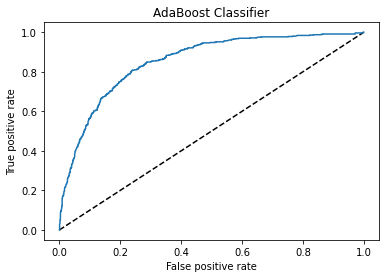

0.7320972928119489

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost Classifier')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

# Saving the model

In [52]:
import joblib
joblib.dump(ad,'adfile.obj')

['adfile.obj']

# Prediction

In [53]:
ad_from_joblib=joblib.load('adfile.obj')

In [54]:
ad_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])